<a href="https://colab.research.google.com/github/ashish-cell/BADM-211-FA21/blob/main/Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install dmba

In [53]:
%matplotlib inline

In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from dmba import regressionSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [62]:
x = np.arange(-20.0, 20.0, 0.1) # Generate 200 values of the independent variable
  
  
y = 1000 - np.power(x, 2) # In the population, this is the relationship b/n y (dependent variable) and x(independent variable)

y_noise = 2 * np.random.normal(0, 20, size = x.size) # In the sample we see, we see some noise

ydata = y + y_noise # Thus, the observed values of y in the data are a combination of the real y and the noise

x2 = np.power(x, 2) # we add another variable "x2" which is just the square of x 



In [63]:
# creating a dataframe with the independent variable (x), ydata, y w/o noise, and x2
data_df = pd.DataFrame({"y" : ydata,
                        "x" : x,
                        "x2" : x2,
                        "y_wo_noise": y})

data_df["noise"] = y_noise # Also add noise to the dataframe


In [64]:
data_df.head()

,y,x,x2,y_wo_noise,noise
0,606.924882,-20.0,400.00,600.00,6.924882
1,591.076201,-19.9,396.01,603.99,-12.913799
2,556.395325,-19.8,392.04,607.96,-51.564675
3,595.687023,-19.7,388.09,611.91,-16.222977
4,590.665973,-19.6,384.16,615.84,-25.174027


In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   y           400 non-null    float64
 1   x           400 non-null    float64
 2   x2          400 non-null    float64
 3   y_wo_noise  400 non-null    float64
 4   noise       400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [66]:
# Split the data randomly into train and test such that 320 observations will go to df_train and 80 will go to df_test

df_train, df_test = train_test_split(data_df, test_size =0.2, random_state = 1)
print(df_train.shape)
print(df_test.shape)

(320, 5)
(80, 5)


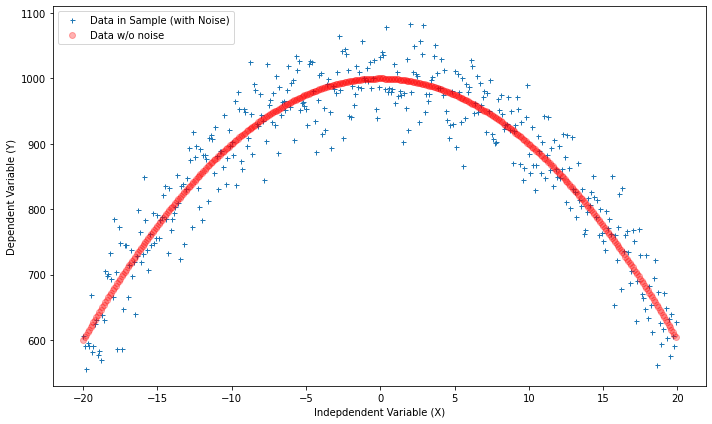

In [67]:
# Plotting the data without noise and with noise 
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, ydata,  '+', markersize =5, label ="Data in Sample (with Noise)")
ax.plot(x, y, 'ro', alpha = 0.3, label = "Data w/o noise") 

ax.legend(loc='upper left')

ax.set_xlabel('Indepdendent Variable (X)')
ax.set_ylabel('Dependent Variable (Y)')

fig.tight_layout()
plt.show()

**We will attempt to fit a linear regression models that can make predictions that trace the red point (curve) in the picture above.**

We will fit three models: 
1. *Simple Model* which will fail to consider useful information (signal) and thus will suffer from underfitting (high bias)

2. *Complex Model* which will consider only useful information (signal) but not pick up the noise and thus will not suffer from underfitting (bias)

3. *Super Complex Model* which will pick up noise with information (signal) and will thus suffer from overfititng (high variance)

*Variance is defined as sensitivity of the model when the data is changed. This means a model that suffers from high variance may perform well on one data and may perform poorly on another dataset. Thus, its performance varies when we change the data. A model that suffers from overftting performs well on training data and poorly on the test data*
 

# Simple Model

In [68]:
# This model only uses x and thus fails to imagine that there could be a curvilinear relationship b/n x and y
X_train = np.array(df_train["x"]).reshape(-1,1)
y_train = df_train["y"]
X_test = np.array(df_test["x"]).reshape(-1,1)
y_test = df_test["y"]


In [69]:
lm_model = LinearRegression()

simple_model = lm_model.fit(X_train, y_train)

simple_prediction_train = simple_model.predict(X_train)

simple_prediction_test = simple_model.predict(X_test)

print(regressionSummary(y_train, simple_prediction_train))

print(regressionSummary(y_test, simple_prediction_test))





Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 124.8309
            Mean Absolute Error (MAE) : 105.0573
          Mean Percentage Error (MPE) : -2.4029
Mean Absolute Percentage Error (MAPE) : 13.1128
None

Regression statistics

                      Mean Error (ME) : -0.7337
       Root Mean Squared Error (RMSE) : 135.0754
            Mean Absolute Error (MAE) : 112.1703
          Mean Percentage Error (MPE) : -2.8642
Mean Absolute Percentage Error (MAPE) : 13.9991
None


***As we see above, the model performs quite similarly on the train and test datasets. This shows that the model does not suffer from high variance (overfitting). However, the model may still suffer from bias. we will see that the model does suffer from bias (underfitting) as its MAPE on either datasets is pretty high.***

## Visual representation how well does the simple model fit on train and test data

*Model fitting on Train data*

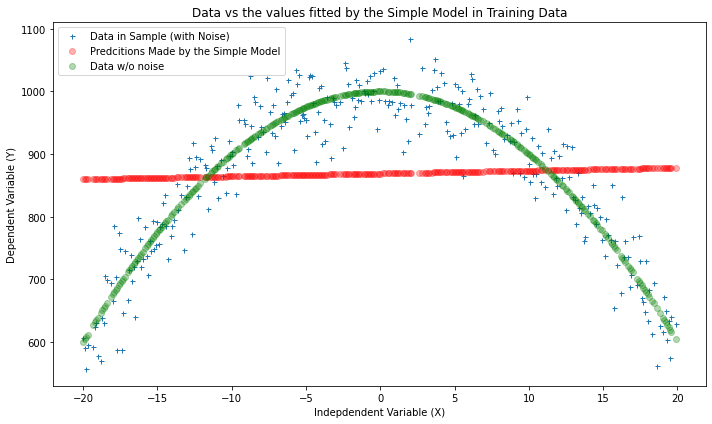

In [71]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(df_train.x, df_train.y,  '+', markersize =5, label ="Data in Sample (with Noise)")
ax.plot(df_train.x, simple_prediction_train, 'ro', alpha = 0.3, label = "Predcitions Made by the Simple Model") 

ax.plot(df_train.x, df_train.y_wo_noise, 'go', alpha = 0.3, label = "Data w/o noise") 


ax.legend(loc='upper left')

ax.set_xlabel('Indepdendent Variable (X)')
ax.set_ylabel('Dependent Variable (Y)')
ax.set_title("Data vs the values fitted by the Simple Model in Training Data")

fig.tight_layout()
plt.show()

***As can be seen above, the red line (our model predictions) fail to trace the green curve at all. This means our model is too simplistic and thus highly underfit the training data. A model that does not fit the training data even decently, is highly unlikely to work any better on the test data. In fact, a model is NEVER expected to work well on the testing data if it did not work on the training data***

*Model fitting on Test data*

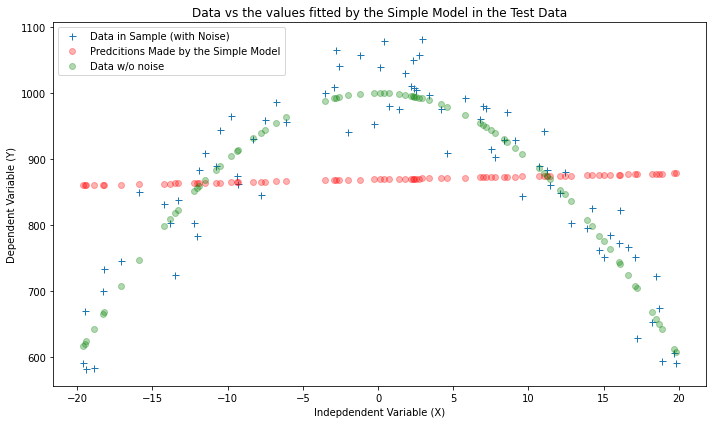

In [72]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(df_test.x, df_test.y,  '+', markersize =7, label ="Data in Sample (with Noise)")
ax.plot(df_test.x, simple_prediction_test, 'ro', alpha = 0.3, label = "Predcitions Made by the Simple Model") 
ax.plot(df_test.x, df_test.y_wo_noise, 'go', alpha = 0.3, label = "Data w/o noise") 

ax.legend(loc='upper left')

ax.set_xlabel('Indepdendent Variable (X)')
ax.set_ylabel('Dependent Variable (Y)')
ax.set_title("Data vs the values fitted by the Simple Model in the Test Data")

fig.tight_layout()
plt.show()

***We see that the red points do not trace the the green points at all. This shows that the model performance on the test data is abysmal.***



#**A complex model, which considers some additional information (x2)**

In [106]:
X_train = df_train[["x", "x2"]] 
y_train = df_train.y
X_test = df_test[["x", "x2"]]
y_test = df_test.y


In [75]:
lm_model = LinearRegression()

complex_model = lm_model.fit(X_train, y_train) # we call this a complex model 

complex_prediction_train = complex_model.predict(X_train)

complex_prediction_test = complex_model.predict(X_test)

print(regressionSummary(y_train, complex_prediction_train))

print(regressionSummary(y_test, complex_prediction_test))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 40.6682
            Mean Absolute Error (MAE) : 32.4357
          Mean Percentage Error (MPE) : -0.2557
Mean Absolute Percentage Error (MAPE) : 3.8542
None

Regression statistics

                      Mean Error (ME) : 6.8123
       Root Mean Squared Error (RMSE) : 44.3418
            Mean Absolute Error (MAE) : 36.6169
          Mean Percentage Error (MPE) : 0.4788
Mean Absolute Percentage Error (MAPE) : 4.3624
None


***We notice above the model performance has improved much by adding x2 as a predictor. Thus, our model does use some important information to make better predictions***

## Visual representation how well does the just right complex model fit on train and test data

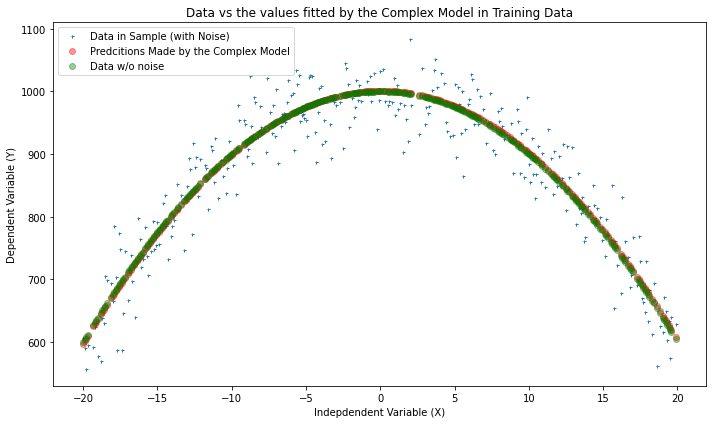

In [80]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(df_train.x, df_train.y,  '+', markersize =3, label ="Data in Sample (with Noise)")
ax.plot(df_train.x, complex_prediction_train, 'ro', alpha = 0.4, label = "Predcitions Made by the Complex Model") 
ax.plot(df_train.x, df_train.y_wo_noise, 'go', alpha = 0.4, label = "Data w/o noise") 

ax.legend(loc='upper left')

ax.set_xlabel('Indepdendent Variable (X)')
ax.set_ylabel('Dependent Variable (Y)')
ax.set_title("Data vs the values fitted by the Complex Model in Training Data")

fig.tight_layout()
plt.show()

***As we notice that the red points(model predictions) are barely distinguishable from the green point (real data, w/o) noise, we conclude that our model is just right. Thus we expect it to do well on the test data as well.***

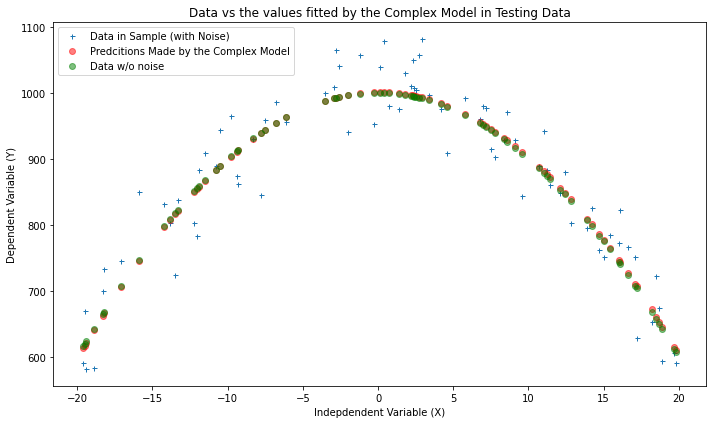

In [82]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(df_test.x, df_test.y,  '+', markersize =5, label ="Data in Sample (with Noise)")
ax.plot(df_test.x, complex_prediction_test, 'ro', alpha = 0.5, label = "Predcitions Made by the Complex Model") 
ax.plot(df_test.x, df_test.y_wo_noise, 'go', alpha = 0.5, label = "Data w/o noise") 

ax.legend(loc='upper left')

ax.set_xlabel('Indepdendent Variable (X)')
ax.set_ylabel('Dependent Variable (Y)')
ax.set_title("Data vs the values fitted by the Complex Model in Testing Data")

fig.tight_layout()
plt.show()

***As seen above in the test dataset also, the model predictions trace the real data (w/o) noise as well as it did on the train dataset, indicating the right level of model complexity; the model picks up relevant information but does not pick noise.***

#**A Super Complex Moddel, which picks up noise along with information (signal)**

In [109]:
X_train = df_train[["x2", "noise"]] # Add noise also as a predictor
y_train = df_train.y
# X_test = np.array(df_test[["x2"]]).reshape(-1,1) # Do not remove the #
y_test = df_test.y

In [125]:
lm_model = LinearRegression()

super_complex_model = lm_model.fit(X_train, df_train.y)

super_complex_prediction_train = super_complex_model.predict(X_train)

#pred_y_train = super_complex_model.intercept_ + super_complex_model.coef_[0] * df_train.x2 + super_complex_model.coef_[1] * df_train.noise # This is how we can make predictions 

super_complex_prediction_test = super_complex_model.predict(X_test)

print(regressionSummary(df_train.y, super_complex_prediction_train))

print(regressionSummary(y_test, super_complex_prediction_test))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000
None

Regression statistics

                      Mean Error (ME) : -268.7173
       Root Mean Squared Error (RMSE) : 370.8361
            Mean Absolute Error (MAE) : 280.5956
          Mean Percentage Error (MPE) : -36.9911
Mean Absolute Percentage Error (MAPE) : 38.1126
None


***The performance of this model depends so much on the data. On the training dataset, it performs perfectly, making zero errors. However, its performance is so low on the test dataset. This is an evidence of overfitting. This happened because our model picked up noise along with the signal. The noise is an irrelevant information that, by definition, will not be available in the future dataset.*** 

## Visual representation how well does the super complex model fit on train and test data

In [126]:
# Just some manipulation to make sure graphs are drawn well. 
sort_df = pd.DataFrame({"y":df_train.y, 
                        "pred_y": super_complex_prediction_train, 
                        "x" : df_train.x,
                        "y_wo_noise": df_train.y_wo_noise})

sort_df = sort_df.sort_values(by = "x")

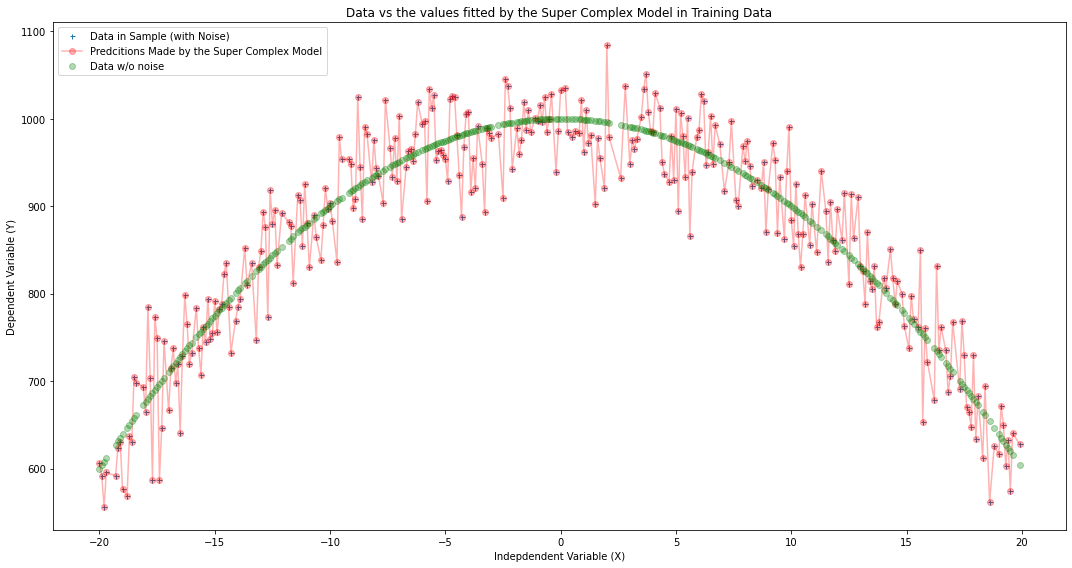

In [127]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(sort_df.x, sort_df.y,  '+', markersize =5, label ="Data in Sample (with Noise)")
ax.plot(sort_df.x, sort_df.pred_y, marker = 'o', c =  "r", alpha = 0.3, label = "Predcitions Made by the Super Complex Model") 
ax.plot(sort_df.x, sort_df.y_wo_noise, 'go', alpha = 0.3, label = "Data w/o noise") 

ax.legend(loc='upper left')

ax.set_xlabel('Indepdendent Variable (X)')
ax.set_ylabel('Dependent Variable (Y)')
ax.set_title("Data vs the values fitted by the Super Complex Model in Training Data")

fig.tight_layout()
plt.show()

***As we see, the model predictions (red line) does not trace the green points well but so perfectly follows the "+" signs (the data). This is a sign of overfitting. The model performs well when it comes to predict the train data point (+) but will fail in the test dataset.***

#In the cell below, we show the performance of the three models on the Train and Test datasets

In [132]:
print()
print()
print()
print("Simple (underfitting) model's performance on Train and Test data")
print("Performance on Train Data", regressionSummary(y_train, simple_prediction_train))
print("Performance on Test Data", regressionSummary(y_test, simple_prediction_test))

print()
print()
print()

print(" Right model's performance on Train and Test data")
print("Performance on Train Data", regressionSummary(y_train, complex_prediction_train))
print("Performance on Test Data",regressionSummary(y_test, complex_prediction_test))

print()
print()
print()

print("Overly complex (overfitting) model's performance on Train and Test data")
print("Performance on Train Data", regressionSummary(y_train, super_complex_prediction_train))
print("Performance on Test Data",regressionSummary(y_test, super_complex_prediction_test))






Simple (underfitting) model's performance on Train and Test data

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 124.8309
            Mean Absolute Error (MAE) : 105.0573
          Mean Percentage Error (MPE) : -2.4029
Mean Absolute Percentage Error (MAPE) : 13.1128
Performance on Train Data None

Regression statistics

                      Mean Error (ME) : -0.7337
       Root Mean Squared Error (RMSE) : 135.0754
            Mean Absolute Error (MAE) : 112.1703
          Mean Percentage Error (MPE) : -2.8642
Mean Absolute Percentage Error (MAPE) : 13.9991
Performance on Test Data None



 Right model's performance on Train and Test data

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 40.6682
            Mean Absolute Error (MAE) : 32.4357
          Mean Percentage Error (MPE) : -0.2557
Mean Absolute Percentage Error (MAPE) : 3.8542
Performance on Train Dat

In [133]:
# Adjusted R Squared on Training Data for the three Models
print("Adj R2 for simple (underfitting) model:", adjusted_r2_score(y_train, simple_prediction_train, simple_model))
print("Adj R2 for complex (right) model:", adjusted_r2_score(y_train, complex_prediction_train, complex_model))
print("Adj R2 for super complex model (overfitting):", adjusted_r2_score(y_train, super_complex_prediction_train, super_complex_model))

print()
print()
print()

# Adjusted R Squared on Testing Data for the three Models
print("Adj R2 for simple (underfitting) model:", adjusted_r2_score(y_test, simple_prediction_test, simple_model))
print("Adj R2 for complex (right) model:", adjusted_r2_score(y_test, complex_prediction_test, complex_model))
print("Adj R2 for super complex model (overfitting):", adjusted_r2_score(y_test, super_complex_prediction_test, super_complex_model))


Adj R2 for simple (underfitting) model: -0.0013694398017911613
Adj R2 for complex (right) model: 0.8933825467489258
Adj R2 for super complex model (overfitting): 1.0



Adj R2 for simple (underfitting) model: -0.01844762584428894
Adj R2 for complex (right) model: 0.8888223962672045
Adj R2 for super complex model (overfitting): -6.775961447915638


***As we see the adjusted R_squared on the training data increased consistently as we made the model more complex. However, adjusted R_squared increased and then decreased for the test dataset as we increased model complexity. The level of complexicity where the model performs the best on the test data is the right level, niether underfitting not overfitting.***